# Chapter 2: Data Manipulation với pandas


Trong chương này chúng ta sẽ thực hành một số hàm thường được sử dụng cho khoa học dữ liệu của gói **pandas** cũng như  khái niệm về DataFrame - kiểu cấu trúc và tổ chức dữ liệu được sử dụng bởi gói pandas (tương tự như Data Frame của R). 
### 1. DataFrame

DataFrame (viết tắt là DF) là một kiểu cấu trúc và tổ chức dữ liệu được bố trí thành dạng bảng gồm hàng và cột (như bảng số liệu của  Excel). Để tạo DF trước hết chúng ta cần gọi gói pandas: 


In [30]:
# Gọi gói pandas: 
import pandas as pd

Giả sử chúng ta muốn tạo ra một DF chứa thông tin về số huy chương của 3 quốc gia dẫn đầu của [Seagame 2017](https://en.wikipedia.org/wiki/2017_Southeast_Asian_Games) thì cách thức nhập  dữ liệu trực tiếp để tạo DF như sau: 

In [31]:
#=================
#     Cách 1
#=================

# Tạo ra ba chuỗi: 
quoc_gia = pd.Series(["MAS", "THA", "SGP"])
gold = pd.Series([144, 72, 58])
silver =  pd.Series([91, 86, 58])

# Hợp nhất 3 chuỗi thành DF: 
df1 = pd.DataFrame({"Nation": quoc_gia, 
                   "Gold": gold, 
                   "Silver": silver},
                   columns = ["Nation", "Gold", "Silver"])

# Xem DF tạo ra: 
df1

,Nation,Gold,Silver
0,MAS,144,91
1,THA,72,86
2,SGP,58,58


In [32]:
#================
#    Cách 2
#================

data = {"nat": ["MAS", "THA", "SGP"], 
       "gol": [144, 72, 58], 
       "sil": [91, 86, 58]}

df2 = pd.DataFrame(data, columns = ["nat", "gol",  "sil"])
df2

,nat,gol,sil
0,MAS,144,91
1,THA,72,86
2,SGP,58,58


### 2. Series

Nếu coi DF là một phân tử thì nó sẽ được tạo thành từ các nguyên tử nhỏ hơn. Với DF có tên df1 ở trên thì các nguyên tử nhỏ hơn  này là quoc_gia, gold và silver. Giới sử dụng Python gọi chúng là **Series**. Chúng ta có thể xem kiểu dữ liệu của  series bằng lệnh **type** đã biết: 

In [33]:
type(gold)

pandas.core.series.Series

Với người sử dụng R thì cấu trúc dữ liệu kiểu này tương tự vector. Do vậy chúng ta có thể áp dụng các hàm toán học cho chúng: 

In [34]:
# Tính tổng của series: 
sum(gold)

274

In [35]:
# Hay kiểm tra điều kiện logic: 
gold > 100

0     True
1    False
2    False
dtype: bool

In [36]:
# Truy cập vào từng phần tử cấu thành series: 
gold[1]

72

In [37]:
# Đếm số lượng các quốc gia có nhiều hơn 80 huy chương vàng: 
sum(gold > 80)

1

In [38]:
# Hay nhân tất cả các phần  tử với 10: 
gold*10

0    1440
1     720
2     580
dtype: int64

In [39]:
# Chiều dài của series: 
len(gold)

3

Những hiểu biết sơ bộ vừa trình bày ở trên về DataFrame và Series là rất quan trọng cho những công việc phức tạp  liên  quan đến phân tích dữ liệu sau này. 

### 3. Đọc dữ liệu định dạng .csv

Cách thức nhập dữ liệu trực tiếp mà chúng ta vừa thực hành ở trên thường sử dụng không  phổ biến Trong thực tế chúng ta thường đọc dữ liệu vào Python từ một định dạng của một phần mềm (hoặc một cơ sở dữ liệu) khác như Excel chẳng hạn. Dưới đây là một ví dụ về đọc file dữ liệu có tên *educ_Data.csv* với chú ý rằng những điểm dữ liệu trống (Missing Value) được biểu diễn bằng dấu hai chấm. Để đọc bộ dữ liệu này và chỉ định luôn ba cột biến muốn sử dụng chúng ta sử dụng hàm **pd.read_csv()** theo cách thức như sau: 


In [40]:
# Đọc dữ liệu: 
edu = pd.read_csv("E:/data_science_python/educ_data.csv", na_values = ":")
# Và xem 5 dòng đầu của DF:
edu.head()

,TIME,GEO,INDIC_ED,Value,Flag and Footnotes
0,2000,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
1,2001,European Union (28 countries),Total public expenditure on education as % of ...,NaN,NaN
2,2002,European Union (28 countries),Total public expenditure on education as % of ...,5.00,e
3,2003,European Union (28 countries),Total public expenditure on education as % of ...,5.03,e
4,2004,European Union (28 countries),Total public expenditure on education as % of ...,4.95,e


Kiểu dữ liệu là DF với thông báo là **pandas.core.frame.DataFrame** như  ta có thể thấy: 

In [41]:
# Xem kiểu cấu trúc và tổ chức dữ liệu của DF: 
type(edu)

pandas.core.frame.DataFrame

In [42]:
# Đếm số dòng - cột của DF: 
edu.shape

(384, 5)

In [43]:
# Chú ý kiểu dữ liệu tạo ra: 
a = edu.shape
type(a)

tuple

In [44]:
# Vì là một tuble nên có thể truy cập từng phần tử của nó: 
a[0] 

384

In [45]:
a[1]

5

Có thể **chỉ định một cách cụ thể** cột nào của bộ dữ liệu gốc được đọc vào Python và xem qua dữ liệu: 


In [46]:
edu = pd.read_csv("E:/data_science_python/educ_data.csv", 
                  na_values = ":", 
                  usecols = ["TIME", "GEO", "Value"])

edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


In [47]:
# Tên của các cột biến: 
list(edu)

['TIME', 'GEO', 'Value']

In [48]:
# Nên xem xét chi tiết hơn và nó là một list: 
b = list(edu)
type(b)

list

In [49]:
# Là list nên có thể truy cập từng phần tử theo vị trí: 
b[0]

'TIME'

###  3. Biến  đổi dữ liệu

Trong mụcnày chúng ta sẽ nghiên cứu một số hàm quan trọng cho Data Manipulation / Wrangling (tạm dịch là biến đổi dữ liệu) thường được sử dụng khi phân tích dữ liệu. 

####  3.1Trích một hay nhiều cột

Chúng ta sử dụng dấu **[]** để trích ra một hay một số cột của DF gốc: 


In [50]:
# Trích ra cột Value (kết quả là một series): 
s1 = edu["Value"]
# Xem 5 quan sát đầu: 
s1.head()

0     NaN
1     NaN
2    5.00
3    5.03
4    4.95
Name: Value, dtype: float64

In [51]:
# Trích ra hai cột (đây lại là một DF): 
s2 = edu[["Value", "TIME"]]
s2.head()

,Value,TIME
0,NaN,2000
1,NaN,2001
2,5.00,2002
3,5.03,2003
4,4.95,2004


In [52]:
# Có thể kiêm tra lại, ví dụ, nhận định rằng s2 là một DF: 
type(s2)

pandas.core.frame.DataFrame

In [53]:
# Còn s1 lại là series: 
type(s1)

pandas.core.series.Series

In [54]:
# Đối với cột biến định tính: 
edu["GEO"].head()

0    European Union (28 countries)
1    European Union (28 countries)
2    European Union (28 countries)
3    European Union (28 countries)
4    European Union (28 countries)
Name: GEO, dtype: object

Có thể thấy rằng cách thức tư duy của pandas mà cụ thể là dấu chấm ở đây tương tự  như **toán tử pipe (%>%)** mà chúng ta đã biết đối với những người sử dụng R. Thực vậy, edu["GEO"] là nguyên liệu đầu vào còn dấu . có nghĩa là *kế đến là* liệt kê 5 phần tử đầu tiên của nguyên liệu đầu vào được chọn. 

#### 3.2 Trích ra một  số dòng

In [55]:
# Trích ra dòng từ 10 đến 13: 
df2 = edu[10:13]
df2

,TIME,GEO,Value
10,2010,European Union (28 countries),5.41
11,2011,European Union (28 countries),5.25
12,2000,European Union (27 countries),4.91


#### 3.3 Trích ra vừa dòng vừa cột: 

In [57]:
# Lấy ra các dòng từ 2 đến 5, cột Value và TIME: 
edu.ix[2:5, ["Value", "TIME"]]


,Value,TIME
2,5.00,2002
3,5.03,2003
4,4.95,2004
5,4.92,2005


In [58]:
# Lấy các quan sát ở dòng 0, 2, 6, 19 ở cột GEO: 
edu.ix[[0, 2, 6, 19], "GEO"]

0     European Union (28 countries)
2     European Union (28 countries)
6     European Union (28 countries)
19    European Union (27 countries)
Name: GEO, dtype: object

In [59]:
# Tương tự: 
edu.ix[[4, 6, 10], ["Value", "TIME"]]

,Value,TIME
4,4.95,2004
6,4.91,2006
10,5.41,2010


In [60]:
# Lấy ra ngẫu nhiên không hoàn lại 2 quan sát từ df1: 
df1.sample(2, replace = False)

,Nation,Gold,Silver
2,SGP,58,58
0,MAS,144,91


Tất nhiên kết quả của bạn có thể khác. Và thực hiện  lại câu lệnh kết quả cũng khác. Để cố định kết quả chúng ta sử dụng lệnh gieo hạt. Lấy ví dụ với edu: 

In [61]:
# Lấy ra 10 quan sát của  edu: 
edu.sample(10, random_state = 9)

,TIME,GEO,Value
105,2009,Bulgaria,4.58
282,2006,Malta,6.45
235,2007,Latvia,5.07
162,2006,Ireland,4.73
294,2006,Netherlands,5.50
101,2005,Bulgaria,4.25
280,2004,Malta,4.66
325,2001,Portugal,5.39
124,2004,Denmark,8.43
80,2008,Euro area (13 countries),4.94


In [62]:
# Lấy ra 50% số dòng từ edu theo cách thức chọn mẫu không hoàn lại: 
df50 = edu.sample(frac = 0.5, random_state = 9)
df50.shape

(192, 3)

Những dòng lệnh dưới đây một  lần nữa cho thấy sự tương tự giữa toán tử pipe ở R và dấu . của Python: 

In [63]:
# Vừa chọn cột, vừa lấy  ngẫu nhiên 10 quan sát: 
edu[["TIME", "Value"]].sample(10, random_state = 5)

,TIME,Value
52,2004,4.80
213,2009,4.70
139,2007,4.49
182,2002,4.25
300,2000,5.66
75,2003,5.04
49,2001,NaN
344,2008,NaN
377,2005,6.30
157,2001,4.24


In [64]:
# Vừa chọn cột, vừa lấy ngẫu nhiên 10 quan sát rồi tính mean: 
edu[["TIME", "Value"]].sample(10, random_state = 5).mean()

TIME     2004.000
Value       4.935
dtype: float64

Lưu ý rằng hàm **mean()** mà chúng ta vừa sử dụng ở trên của gói pandas tự động loại NA trước khi tính toán. Chúng ta sẽ nghiên cứu kĩ  hơn về điều này ở mục sau. 

#### 3.4 Lọc dữ liệu 

In [65]:
# Lọc ra DF mà Value lớn hơn 7 rồi coi 5 quan sát đầu: 
lon_hon7 = edu[edu["Value"] > 7]
lon_hon7.head()

,TIME,GEO,Value
120,2000,Denmark,8.28
121,2001,Denmark,8.44
122,2002,Denmark,8.44
123,2003,Denmark,8.33
124,2004,Denmark,8.43


In [66]:
# Hoặc một cách thức khác: 
edu[edu["Value"] > 7].head()

,TIME,GEO,Value
120,2000,Denmark,8.28
121,2001,Denmark,8.44
122,2002,Denmark,8.44
123,2003,Denmark,8.33
124,2004,Denmark,8.43


In [67]:
# Lọc ra những quan sát là French ở cột GEO: 
phap = edu[edu["GEO"] == "France"]

# Rồi xem qua dữ liệu: 
phap.head()


,TIME,GEO,Value
192,2000,France,6.04
193,2001,France,5.95
194,2002,France,5.90
195,2003,France,5.92
196,2004,France,5.80


#### 3.5 Lọc dữ liệu thiếu

Dữ liệu thiếu (Missing Data) là một  vấn đề thường gặp khi xử lí dữ liệu do vậy chúng ta nên chú ý nhóm lệnh liên quan đến  dữ liệu thiếu. 


In [68]:
# Kiếm tra dữ liệu thiếu cho một series và xem 5 quan sát đầu: 
edu["Value"].isnull().head()

0     True
1     True
2    False
3    False
4    False
Name: Value, dtype: bool

In [69]:
# Tổng số NA của series này là 23: 
edu["Value"].isnull().sum()

23

In [70]:
# Kết quả 23 này có thể được tìm theo một cách khác bằng một hàm tự viết: 
def tim_na(x): 
    return(x.isnull().sum())

# Áp dụng hàm trên: 
tim_na(edu["Value"])

23

In [71]:
# Tìm số lượng NA cho các cột của DF: 
edu.apply(tim_na)

TIME      0
GEO       0
Value    23
dtype: int64

In [72]:
# Trích ra DF thiếu giá trị ở cột Value:
thieu_df = edu[edu["Value"].isnull()]
# 5 quan sát đầu:
thieu_df.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
36,2000,Euro area (18 countries),NaN
37,2001,Euro area (18 countries),NaN
48,2000,Euro area (17 countries),NaN


In [73]:
# Trích ra DF mà không thiếu dữ liệu ở cột Value: 
full_df = edu.dropna(subset = ["Value"])
full_df.head()

,TIME,GEO,Value
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95
5,2005,European Union (28 countries),4.92
6,2006,European Union (28 countries),4.91


#### 3.7 Sắp xếp lại dữ DF theo chiều tăng - giảm

In [74]:
# Sắp xếp theo chiều giảm dần của cột Value: 
df_giam = edu.sort_values(by = "Value", ascending = False)
df_giam.head()

,TIME,GEO,Value
130,2010,Denmark,8.81
131,2011,Denmark,8.75
129,2009,Denmark,8.74
121,2001,Denmark,8.44
122,2002,Denmark,8.44


In [75]:
# Nếu là biến định tính, character thì sẽ sắp xếp thứ tự của bảng chữ cái: 
by_nation = edu.sort_values(by = "GEO")
by_nation.head(10)

,TIME,GEO,Value
300,2000,Austria,5.66
309,2009,Austria,5.98
308,2008,Austria,5.47
307,2007,Austria,5.33
306,2006,Austria,5.40
305,2005,Austria,5.44
304,2004,Austria,5.48
303,2003,Austria,5.53
302,2002,Austria,5.68
301,2001,Austria,5.74


### 4. Hàm tính toán  một  số thống kê chủ yếu

Dưới đây là một số hàm tính toán các thống kê thường sử dụng khi phân tích dữ liệu: 

| Hàm  | Chức năng | 
|-----------|-------------|
| count()   |Number of non-null observations|  
| sum()     |Sum of values|
| mean()    |Mean of values            | 
| median()  |Arithmetic median of values             |
| min()     |Minimum|
| max()     |Maximum|
| prod()    |Product of values|
| std()     |Unbiased standard deviation|
| var()     | Unbiased variance|


Lưu ý rằng các hàm của pandas sẽ mặc định **loại bỏ bất kì NA nào trước khi tính toán** như chúng ta có thể kiểm tra: 



In [76]:
# Sử dụng hàm của pandas tính max:
edu["Value"].max()

8.8100000000000005

In [77]:
# Nhưng nếu dùng hàm mean() mặc định thì kết quả là không xác định (nan): 
max(edu["Value"])

nan

In [78]:
# Tính mean: 
edu["Value"].mean()

5.203988919667592

In [79]:
# Không những thế các hàm của pandas còn áp dụng cho các cột biến định lượng: 
edu.mean()

TIME     2005.500000
Value       5.203989
dtype: float64

### 5. Tính  toán  các thống  kê theo nhóm

In [80]:
# Tính mean theo nhóm GEO. Chú ý kết quả là một DF:  
df_by_mean = edu[["GEO", "Value"]].groupby("GEO").mean()

# Xem qua DF này: 
df_by_mean.shape


(32, 1)

In [81]:
# Một số quan sát đầu: 
df_by_mean.head()

,Value
GEO,
Austria,5.618333
Belgium,6.189091
Bulgaria,4.093333
Cyprus,7.023333
Czech Republic,4.168333


In [82]:
# Hay tính median: 
edu[["Value", "GEO"]].groupby("GEO").median().head()

,Value
GEO,
Austria,5.595
Belgium,6.020
Bulgaria,4.065
Cyprus,6.985
Czech Republic,4.175


In [83]:
# Tính mean theo nhóm quốc gia cho Value: 
df10 = edu[["Value", "GEO"]].groupby("GEO").mean()
# Sản phẩm trả về là một DF nên chúng ta lại có thể sử dụng các hàm của pandas cho DF này: 
type(df10)

pandas.core.frame.DataFrame

In [84]:
# Lấy một cột ra và chia cho 100: 
s = edu["Value"] / 100
s.head()

0       NaN
1       NaN
2    0.0500
3    0.0503
4    0.0495
Name: Value, dtype: float64

Áp dụng hàm tính căn bậc 2 cho từng phần tử của cột Value: 

In [85]:
# Gọi gói numpy: 
import numpy as np
s = edu["Value"].apply(np.sqrt)
s.head()

0         NaN
1         NaN
2    2.236068
3    2.242766
4    2.224860
Name: Value, dtype: float64



Nếu cần áp dụng  một hàm vô danh (in-line function) - còn  gọi  là $\lambda$-function thì: 

In [86]:
s = edu["Value"].apply(lambda x: x**2 - 1)
s.head()

0        NaN
1        NaN
2    24.0000
3    24.3009
4    23.5025
Name: Value, dtype: float64



Tạo một cột biến mới có tên **ValueNorm** theo cách thức lấy từng phần tử của cột Value chia cho giá trị lớn nhất của series này:  

In [87]:
edu["ValueNorm"] = edu["Value"] / edu["Value"].max()
edu.tail()

,TIME,GEO,Value,ValueNorm
379,2007,Finland,5.90,0.669694
380,2008,Finland,6.10,0.692395
381,2009,Finland,6.81,0.772985
382,2010,Finland,6.85,0.777526
383,2011,Finland,6.76,0.767310


Xóa cột biến vừa  tạo ra và không tạo một bản sao mới của edu với lựa chọn **inplace = True**: 

In [88]:
edu.drop("ValueNorm", axis = 1, inplace = True)
edu.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),NaN
1,2001,European Union (28 countries),NaN
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


Bổ sung thêm một quan sát vào dòng cuối cùng (thứ 383) là Việt Nam chẳng hạn:  

In [89]:
edu = edu.append({"TIME": 2000, 
                  "Value": 5, 
                  "GEO": "Vietnam"}, ignore_index = True)
edu.tail()

,TIME,GEO,Value
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76
384,2000,Vietnam,5.00


Muốn xóa quan sát vừa bổ sung này: 

In [90]:
edu.drop(max(edu.index), axis = 0, inplace = True)
edu.tail()

,TIME,GEO,Value
379,2007,Finland,5.90
380,2008,Finland,6.10
381,2009,Finland,6.81
382,2010,Finland,6.85
383,2011,Finland,6.76


Thay thế các NA bằng 0  chẳng hạn: 

In [91]:
eduFilled = edu.fillna(value={"Value": 0})
eduFilled.head()

,TIME,GEO,Value
0,2000,European Union (28 countries),0.00
1,2001,European Union (28 countries),0.00
2,2002,European Union (28 countries),5.00
3,2003,European Union (28 countries),5.03
4,2004,European Union (28 countries),4.95


## 6. Tái bố  trí lại dữ  liệu


Chúng ta có thể tái bố trí lại dữ liệu đã có ở một dạng thường gặp khác là bảng Pivot với hàm **pivot_tabel()**: 

In [92]:
# Lọc ra các quan sát từ năm 2006 trở đi: 
filtered_data = edu[edu["TIME"] > 2005]
# Tạo Pivot table: 
pivedu = pd.pivot_table(filtered_data, 
                        values = "Value",
                        index = ["GEO"], 
                        columns = ["TIME"])
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


In [93]:
# Chú ý rằng pivotedu vẫn là DF: 
type(pivedu)

pandas.core.frame.DataFrame

Nên chúng ta lại có thể áp dụng các hàm đã biết cho DF này: 

In [95]:
pivedu.ix[["Spain", "France"], [2006, 2011]]

TIME,2006,2011
GEO,,
Spain,4.26,4.82
France,5.61,5.68


### 7. Xếp hạng

Để loại bỏ một số quan sát sử dụng hàm **drop()**, để đổi nhãn cho một quan sát dùng hàm **rename()**, để loại bỏ bất kì dòng nào có NA sử dụng hàm **dropna()**: 

In [96]:
# Loại bỏ một số giả quốc gia: 
pivedu = pivedu.drop(["Euro area (13 countries)",
                      "Euro area (15 countries)",
                      "Euro area (17 countries)",
                      "Euro area (18 countries)",
                      "European Union (25 countries)",
                      "European Union (27 countries)",
                      "European Union (28 countries)"], axis = 0)
# Đổi tên cho ông Germany (until 1990 former territory of the FRG: 
pivedu = pivedu.rename(index = {"Germany (until 1990 former territory of the FRG)": "Germany"})

# Loại bỏ bất kì dòng nào có NA: 
pivedu = pivedu.dropna()
# Rồi liệt kê 5 quan sát đầu: 
pivedu.head()

TIME,2006,2007,2008,2009,2010,2011
GEO,,,,,,
Austria,5.40,5.33,5.47,5.98,5.91,5.80
Belgium,5.98,6.00,6.43,6.57,6.58,6.55
Bulgaria,4.04,3.88,4.44,4.58,4.10,3.82
Cyprus,7.02,6.95,7.45,7.98,7.92,7.87
Czech Republic,4.42,4.05,3.92,4.36,4.25,4.51


Nếu chúng ta muốn xếp hạng tổng dựa theo tổng của Value theo năm đồng thời xếp hạng cho quốc gia theo giá trị giảm dần đầu tiên sử dụng hàm **sum()** rồi hàm **rank()** để xếp hạng: 

In [386]:
totalSum = pivedu.sum(axis = 1)
totalSum.rank(ascending = False, method = "dense").sort_values().head()

GEO
Denmark    1.0
Cyprus     2.0
Finland    3.0
Malta      4.0
Belgium    5.0
dtype: float64

Như vậy Đan  Mạch là quốc gia đứng đầu bảng. 

###  7. Hình ảnh hóa cho DF 

DF và Series của pandas có thể được hình ảnh hóa với hàm **plot()** của gói chuyên cho đồ họa là **matplotlib** theo kiểu của phần mềm Matlab. Với Rusers thì những lệnh  dưới đây là quen thuộc và dễ hiểu: 

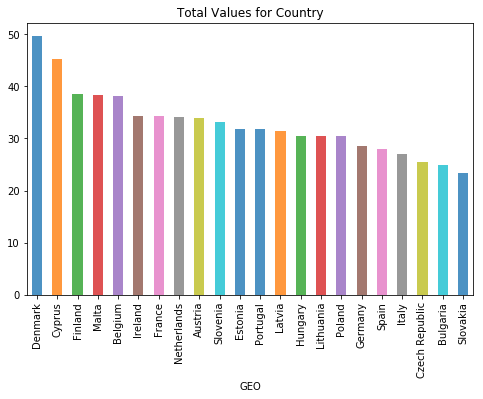

In [100]:
#  Load gói matplotlib: 
import matplotlib.pyplot as plt

# Chọn kích thước cho plot: 
fig = plt.figure(figsize = (8, 5))

# Và vẽ: 
totalSum = pivedu.sum(axis = 1).sort_values(ascending = False)
totalSum.plot(kind = "bar", 
              style = "b", 
              alpha = 0.8,
              title = "Total Values for Country")

# Hiển thị: 
plt.show()

Hoặc một kiểu Barplot phổ biến kiểu chồng lên nhau (stacked): 

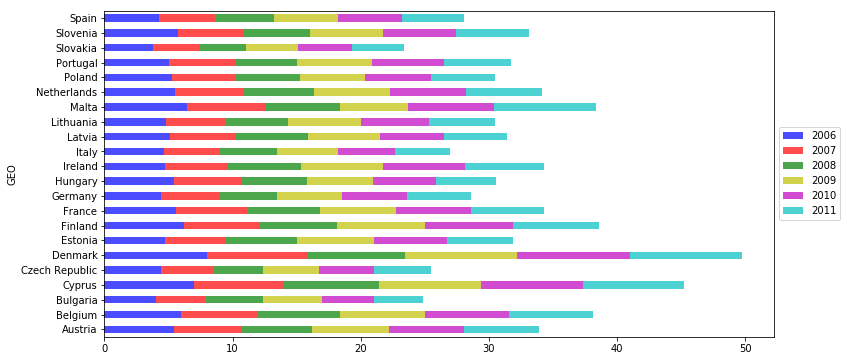

In [101]:
# Chọn màu: 
my_colors = ["b", "r", "g", "y", "m", "c"]
# Vẽ thôi: 
ax = pivedu.plot(kind = "barh", 
                 stacked = True, 
                 color = my_colors, 
                 figsize = (12, 6), 
                 alpha = 0.7)
ax.legend(loc = "center left", bbox_to_anchor = (1, 0.5))
plt.show()

## Kết luận

Trong hầu hết các công việc thực tế thì chỉ cần master một  số nhóm nhỏ các hàm cho manipulation / wrangling. Nếu bạn muốn nhiều hơn thế thì  tham khảo ở đây: 

http://pandas.pydata.org/pandas-docs/stable/